# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


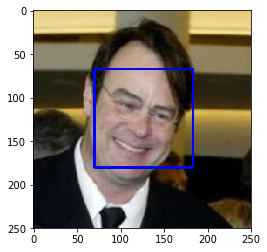

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__  98% of human files have detected a human face in them.
            
        17% of the dog files have detected a dog face in them.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_count = 0
dog_count =0

for human in human_files_short:
    if face_detector(human) == True:
        human_count +=1

for dog in dog_files_short:
    if face_detector(dog) == True:
        dog_count +=1
print((human_count/len(human_files_short))*100)
print((dog_count/len(dog_files_short))*100)


98.0
17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is availablea)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):

    img = Image.open(imas
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                                    transforms.ToTensor(),normalize])
    
    transform_img = transform(img)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        transform_img = transform_img.cuda()
    
    index = VGG16(transform_img)
    
    return torch.max(index,1)[1].item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    result = False
    vgg16_index = VGG16_predict(img_path)
    if vgg16_index >150 and vgg16_index <= 268:
        result = True
    
    return result # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  0% of images in human_files_short have detected a dog.

      100% of the images in dog_files_short have detected a dog.


In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]


human_count = 0
dog_count =0

for human in human_files_short:
    if dog_detector(human) == True:
        human_count +=1

for dog in dog_files_short:
    if dog_detector(dog) == True:
        dog_count +=1
print('percentage of the images in human_files that have detected a dog: ',(human_count/len(human_files_short))*100,'%')
print('percentage of the images in dog_files that have detected a dog: ',(dog_count/len(dog_files_short))*100,'%')



percentage of the images in human_files that have detected a dog:  0.0 %
percentage of the images in dog_files that have detected a dog:  100.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
'''
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')
'''

Using TensorFlow backend.


102858752/102853048 [==============================] - 1s 0us/step


In [10]:
'''from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

'''

In [11]:
'''from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))
'''

In [12]:
'''def resnet_dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))
'''



In [1]:
'''human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
count_humans = 0 
count_dogs = 0

for file in human_files_short:
    if resnet_dog_detector(file) == True:
        count_humans += 1
        
for file in dog_files_short:
    if resnet_dog_detector(file) == True:
        count_dogs += 1

print('%.1f%% images of the first 100 human_files were detected as dog.' % count_humans)
print('%.1f%% images of the first 100 dog_files were detected as dog.' % count_dogs)

'''

NameError: name 'human_files' is not defined

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
import os
import torch
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from torchvision import transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0


data_dir = '/data/dog_images/'

train_path = data_dir + 'train'
val_path = data_dir + 'valid'
test_path = data_dir + 'test'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

train_dataset = datasets.ImageFolder(train_path,  transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            normalize,
        ]))

val_dataset = datasets.ImageFolder(val_path,  transforms.Compose([
            transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            normalize,
        ]))

test_dataset = datasets.ImageFolder(test_path,  transforms.Compose([
             transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, num_workers = num_workers,
                                           shuffle = True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size= batch_size, num_workers = num_workers)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= batch_size, num_workers = num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': val_loader,
    'test': test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: My code resizes the image by performing RandomResizedCrop() method which crops the image to 224 x 224 px which is the standard format for vgg-16 CNN architecture. I performed augmentation on the dataset by performing RandomHorizontalFlip() and RandomRotation to randomize the data. This is however, only done on the training dataset.
For the validation and testing dataset I have resized the images to 224 x 224 instead. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)     
        self.pool = nn.MaxPool2d(2, 2)   
        self.fc1 = nn.Linear(28*28*128, 512)
        self.fc2 = nn.Linear(512, 133) 
        self.dropout = nn.Dropout(0.25) 
        self.batch_norm = nn.BatchNorm1d(512)
    
    def forward(self, x):
                
        x = self.pool(F.relu(self.conv1(x)))               
        x = self.pool(F.relu(self.conv2(x)))                      
        x = self.pool(F.relu(self.conv3(x)))                
                      
        x = x.view(-1, 28*28*128)
        
        x = F.relu(self.batch_norm(self.fc1(x)))        
        x = self.dropout(x)        
        x = F.relu(self.fc2(x))
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I have decided to base my scratch CNN architecture on VGG-16, since it is the most commonly used CNN architectures. I have further simplied the VGG architecture to suit my problem. 

- I have chosen 3 convolution layers followed by max pooling at each step to decrease the size of the image by a factor of 2 , till the size of the image comes to 28 x 28, which is then fed into the deep Fully-connected layers. Furthermore, I have added droupout regularization to reduce overfitting and batch-normalization to normalize all the features and speed up the training.
- The first conv2d layer starts with an input image of 3 x 224 x 224 (for 3 RGB colors), with a kernel size of 3 and padding of 1 for 3x3 conv layer followed by MaxPool2d(2,2) which decreases the size of the image. The output of this layer is fed into the input of the second conv. layer and again Max-pooling is performed which further decreases the size of the image, which is finally fed into the third conv. layer and max-pooling further decreases the size of the image to 28 x 28 x 128.
-This image is then input to a fully connected layer where ReLU activation is performed, and the image features are normalized (Batch Normalization) to increase the training speed and some features are dropped out (0.25) to prefect overfitting. The output is then fed into a second fully connected dense layer which decreases the nodes from 512 to 133 since our given problem has 133 breeds of dog. 
- This version of my scratch CNN is different from VGG because I made my last layer as Fully-connected instead of a softmax layer because, later in the training, I have used CrossEntropyLoss() function to calculate the loss for the model which inherently performs a log-softmax function.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [10]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [12]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
          

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
            valid_loss_min = valid_loss
        
        
            
    # return trained model
    return model


# train the model
model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.232032 	Validation Loss: 4.269612
Validation loss decreased (inf --> 4.269612).  Saving model ...
Epoch: 2 	Training Loss: 4.172868 	Validation Loss: 4.030271
Validation loss decreased (4.269612 --> 4.030271).  Saving model ...
Epoch: 3 	Training Loss: 4.120142 	Validation Loss: 3.987528
Validation loss decreased (4.030271 --> 3.987528).  Saving model ...
Epoch: 4 	Training Loss: 4.026708 	Validation Loss: 4.133102
Epoch: 5 	Training Loss: 3.996762 	Validation Loss: 3.963289
Validation loss decreased (3.987528 --> 3.963289).  Saving model ...
Epoch: 6 	Training Loss: 3.951417 	Validation Loss: 4.079301
Epoch: 7 	Training Loss: 3.878445 	Validation Loss: 3.828208
Validation loss decreased (3.963289 --> 3.828208).  Saving model ...
Epoch: 8 	Training Loss: 3.854692 	Validation Loss: 3.911236
Epoch: 9 	Training Loss: 3.791086 	Validation Loss: 3.709005
Validation loss decreased (3.828208 --> 3.709005).  Saving model ...
Epoch: 10 	Training Loss: 3.725961 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [13]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.691103


Test Accuracy: 15% (126/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [14]:
## TODO: Specify data loaders

transfer_loaders = loaders_scratch.copy()


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

## TODO: Specify model architecture 

n_classes = len(train_dataset.classes)


model_transfer = models.resnet152(pretrained = True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048, 133, bias=True)

fc_parameters = model_transfer.fc.parameters()

for param in fc_parameters:
    param.requires_grad = True

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:03<00:00, 79211785.09it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ For transfer learning, I decided to go with ResNet-152 architecture because, unlike VGG, this does not hugely increase the training time when the number of layers for the neural network are increased. Resnet works on the principle of "Identity shortcut connection" [1] and skips 1 or more layers, to prevent overfitting and thereby, decreasing training time.
For transfer learning, since we are only concerned with the last layer of our network, I deactivated all the initial layers chose the second fully connected layer and fed it 2048 channels and output of 133 (i.e. the number of dog breeds)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [16]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.01)

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
          

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
            valid_loss_min = valid_loss
        
        
            
    # return trained model
    return model




### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [18]:
# train the model
model_transfer =  train(15, transfer_loaders, model_transfer, optimizer_transfer, criterion_transfer, 
                        use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.098317 	Validation Loss: 2.831985
Validation loss decreased (inf --> 2.831985).  Saving model ...
Epoch: 2 	Training Loss: 2.799830 	Validation Loss: 1.752616
Validation loss decreased (2.831985 --> 1.752616).  Saving model ...
Epoch: 3 	Training Loss: 2.147568 	Validation Loss: 1.310581
Validation loss decreased (1.752616 --> 1.310581).  Saving model ...
Epoch: 4 	Training Loss: 1.794479 	Validation Loss: 0.983499
Validation loss decreased (1.310581 --> 0.983499).  Saving model ...
Epoch: 5 	Training Loss: 1.559533 	Validation Loss: 0.870940
Validation loss decreased (0.983499 --> 0.870940).  Saving model ...
Epoch: 6 	Training Loss: 1.428300 	Validation Loss: 0.737759
Validation loss decreased (0.870940 --> 0.737759).  Saving model ...
Epoch: 7 	Training Loss: 1.304353 	Validation Loss: 0.687339
Validation loss decreased (0.737759 --> 0.687339).  Saving model ...
Epoch: 8 	Training Loss: 1.246715 	Validation Loss: 0.641157
Validation loss decreased (0.68733

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
test(transfer_loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.521917


Test Accuracy: 86% (722/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [21]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
import torchvision.transforms as transforms
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    img = Image.open(img_path)
    
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))
    pred_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         normalize])    
    img_tensor = pred_transform(img)[:3,:,:].unsqueeze(0)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    model_transfer.eval()
    # Get predicted category for image
    with torch.no_grad():
        result = model_transfer(img_tensor)
        pred = torch.argmax(result).item()        
    # Turn off evaluation mode
    model_transfer.train()
    prediction = class_names[pred]    
    return prediction

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [22]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if face_detector(img_path):
        print('Human Face Detected!!')
        plt.imshow(Image.open(img_path))
        plt.show()
        
        print(f'This human looks like a ... {predict_breed_transfer(img_path)}')
        print('\n-----------------------------------\n')
        
    elif dog_detector(img_path):
        plt.imshow(Image.open(img_path))
        plt.show()
        
        print(f'Analysing the Breed..... looks like a ... {predict_breed_transfer(img_path)}')
        print('\n-----------------------------------\n')
        
    else:
        plt.imshow(Image.open(img_path))
        plt.show()
        print('Neither a human face or a dog detected in this image.')
        print('\n-----------------------------------\n')


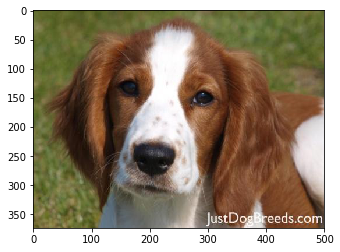

Analysing the Breed..... looks like a ... Irish red and white setter

-----------------------------------

Human Face Detected!!


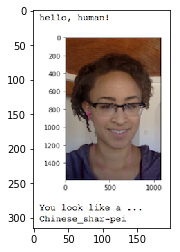

This human looks like a ... Yorkshire terrier

-----------------------------------



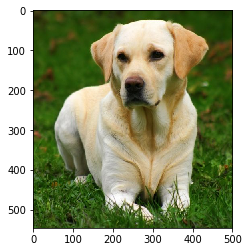

Analysing the Breed..... looks like a ... Labrador retriever

-----------------------------------



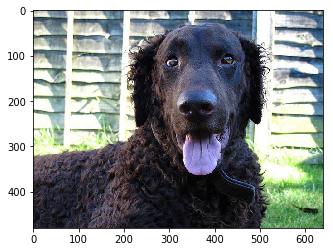

Analysing the Breed..... looks like a ... Curly-coated retriever

-----------------------------------



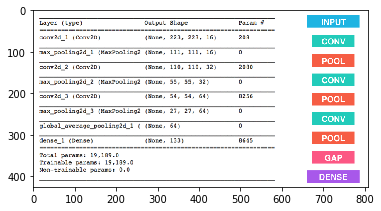

Neither a human face or a dog detected in this image.

-----------------------------------



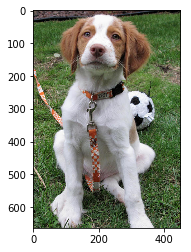

Analysing the Breed..... looks like a ... Brittany

-----------------------------------



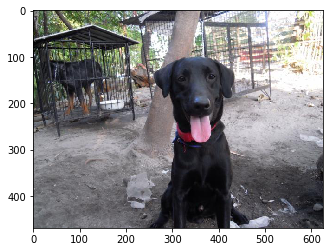

Analysing the Breed..... looks like a ... Labrador retriever

-----------------------------------



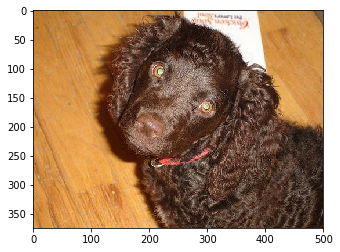

Analysing the Breed..... looks like a ... Boykin spaniel

-----------------------------------



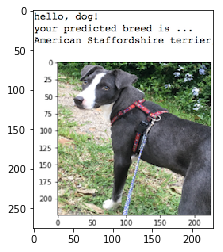

Analysing the Breed..... looks like a ... Great dane

-----------------------------------



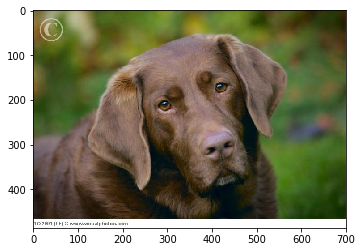

Analysing the Breed..... looks like a ... Labrador retriever

-----------------------------------



In [23]:
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output of my scratch CNN model after applying transfer learning, is much better than I expected, attaining 86% accuracy on the test data, from 15% in the initial training.

- Increasing the training dataset, i.e. training the model with more images of will further increase the accuracy of prediction on the test data.

- Increasing the accuracy of the face_detector algorithm by using some other deep learning architecture like VGG-16 or ResNet.

- Fine tuning the training hyperarameters of our Scratch CNN model like- number of epochs, dropout regularization, batch-size, learning rate, etc. may also improve the overall efficiency of our predictions.

Hello Human!


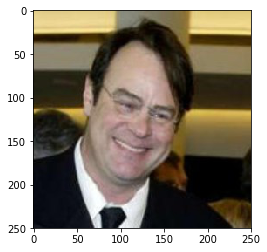

You look like a ... Dachshund

-----------------------------------

Hello Human!


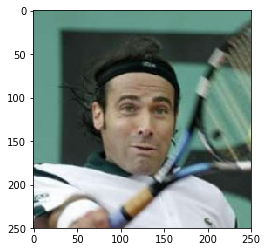

You look like a ... Chesapeake bay retriever

-----------------------------------

Hello Human!


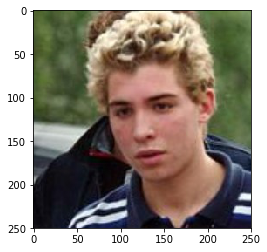

You look like a ... American water spaniel

-----------------------------------

Hello Human!


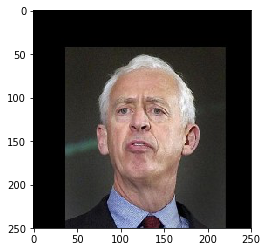

You look like a ... Chinese crested

-----------------------------------



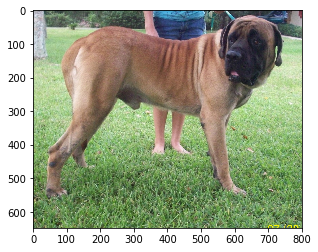

This is a picture of a ... Mastiff

-----------------------------------



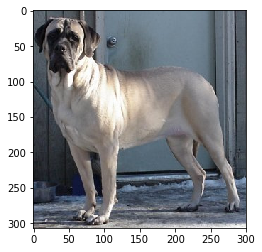

This is a picture of a ... Mastiff

-----------------------------------



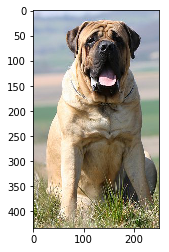

This is a picture of a ... Mastiff

-----------------------------------



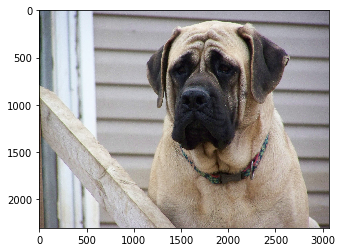

This is a picture of a ... Mastiff

-----------------------------------



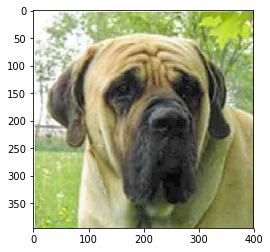

This is a picture of a ... Mastiff

-----------------------------------



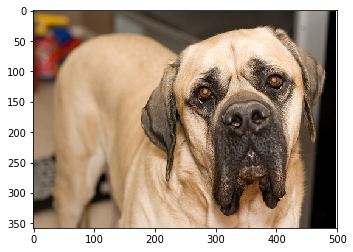

This is a picture of a ... Mastiff

-----------------------------------



In [42]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:4], dog_files[:6])):
    run_app(file)

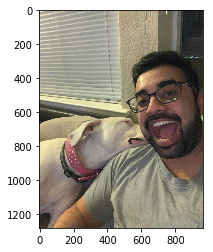

Analysing the Breed..... looks like a ... Italian greyhound

-----------------------------------



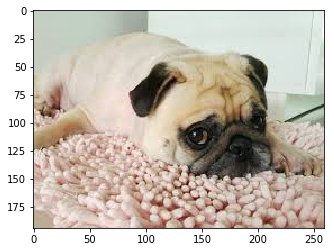

Analysing the Breed..... looks like a ... Bulldog

-----------------------------------

Human Face Detected!!


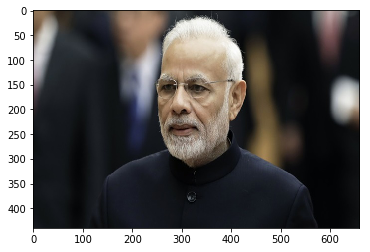

This human looks like a ... Afghan hound

-----------------------------------

Human Face Detected!!


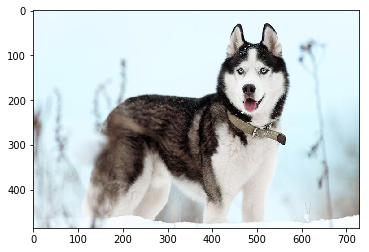

This human looks like a ... Alaskan malamute

-----------------------------------

Human Face Detected!!


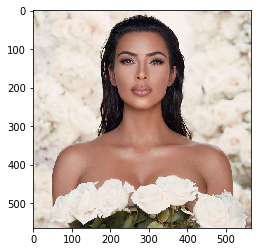

This human looks like a ... Cocker spaniel

-----------------------------------

Human Face Detected!!


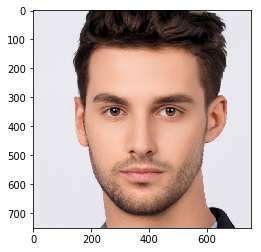

This human looks like a ... Yorkshire terrier

-----------------------------------



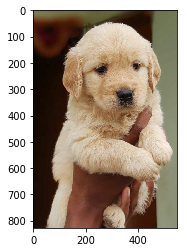

Analysing the Breed..... looks like a ... Golden retriever

-----------------------------------



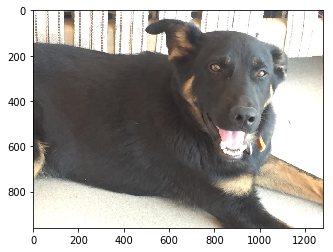

Analysing the Breed..... looks like a ... Beauceron

-----------------------------------

Human Face Detected!!


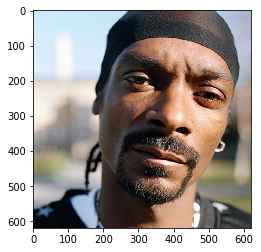

This human looks like a ... Bullmastiff

-----------------------------------



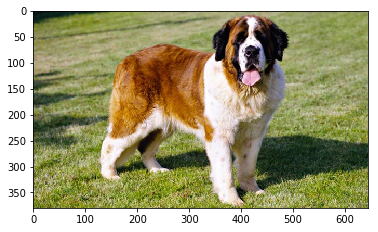

Analysing the Breed..... looks like a ... Saint bernard

-----------------------------------

Human Face Detected!!


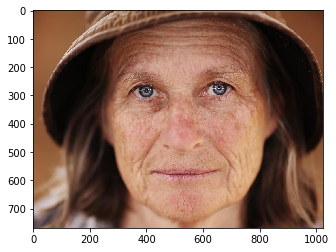

This human looks like a ... Dachshund

-----------------------------------



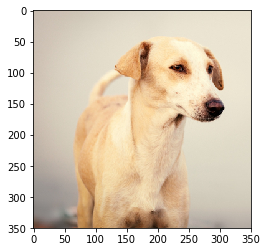

Analysing the Breed..... looks like a ... Greyhound

-----------------------------------



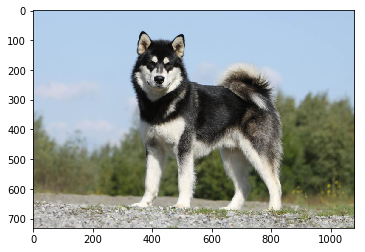

Analysing the Breed..... looks like a ... Alaskan malamute

-----------------------------------



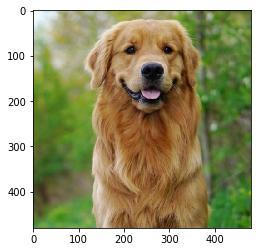

Analysing the Breed..... looks like a ... Golden retriever

-----------------------------------



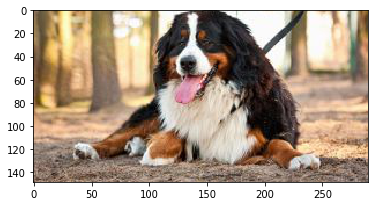

Analysing the Breed..... looks like a ... Bernese mountain dog

-----------------------------------

Human Face Detected!!


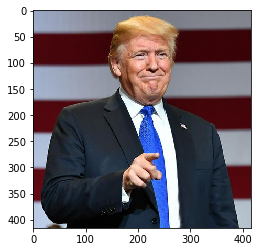

This human looks like a ... English cocker spaniel

-----------------------------------



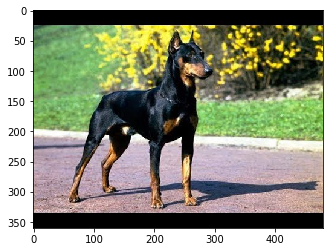

Analysing the Breed..... looks like a ... Doberman pinscher

-----------------------------------



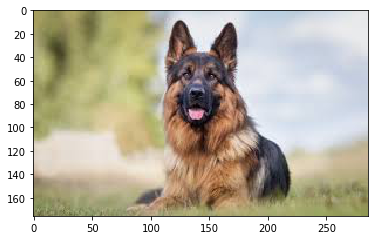

Analysing the Breed..... looks like a ... German shepherd dog

-----------------------------------



In [24]:
for img_file in os.listdir('./test_images'):
    img_path = os.path.join('./test_images', img_file)
    run_app(img_path)